In [33]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
Adding_Hidden_Layer=Dense(encoding_dim, activation= 'relu')(encoded)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(Adding_Hidden_Layer)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

from keras.datasets import mnist, fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/5
235/235 [==============================] - 3s 12ms/step - loss: 0.4992 - accuracy: 0.0055 - val_loss: 0.3397 - val_accuracy: 0.0137
Epoch 2/5
235/235 [==============================] - 3s 12ms/step - loss: 0.3300 - accuracy: 0.0117 - val_loss: 0.3172 - val_accuracy: 0.0183
Epoch 3/5
235/235 [==============================] - 3s 11ms/step - loss: 0.3125 - accuracy: 0.0143 - val_loss: 0.3076 - val_accuracy: 0.0156
Epoch 4/5
235/235 [==============================] - 3s 12ms/step - loss: 0.3041 - accuracy: 0.0160 - val_loss: 0.3037 - val_accuracy: 0.0155
Epoch 5/5
235/235 [==============================] - 3s 12ms/step - loss: 0.3010 - accuracy: 0.0139 - val_loss: 0.3009 - val_accuracy: 0.0149


In [34]:
#test data prediction
prediction = autoencoder.predict(x_test)

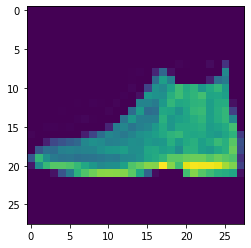

In [35]:
from matplotlib import pyplot as plt
plt.imshow(x_test[0].reshape(28,28))
plt.show()

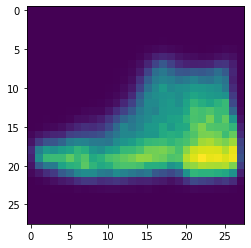

In [36]:
#Reconstructed
plt.imshow(prediction[0].reshape(28,28))
plt.show()

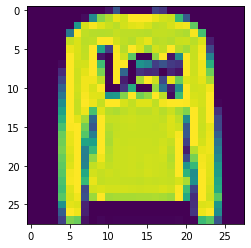

In [37]:
plt.imshow(x_test[1].reshape(28,28))
plt.show()

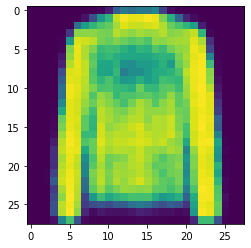

In [39]:
#Reconstructed
plt.imshow(prediction[1].reshape(28,28))
plt.show()